In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions



In [2]:
trn = pd.read_csv('satellite_train.csv')
tst = pd.read_csv('satellite_test.csv')

In [3]:
names = ["red soil", "cotton crop",
"grey soil","damp grey soil","soil with vegetation",
"very damp grey soil"]

vals = [1, 2 ,3 ,4 ,5, 7] # missing 6, 0?..
new_vals = [0, 1, 2, 3, 4, 5]

new = dict(zip(vals, new_vals))

In [4]:
trn['V37'].replace(new, inplace=True)
tst['V37'].replace(new, inplace=True)

# Ex. 1:

Dataset is quite balanced, even though 3 classes are twice as large as other 3, but that should not pose too big of a challenger for us.

<AxesSubplot:>

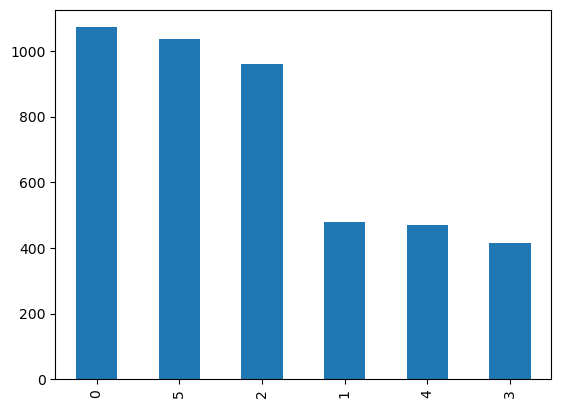

In [5]:
trn['V37'].value_counts().plot(kind='bar')

#  Ex. 2:

The classes are quite linearly seperable, so I expect similiar perfomance. I expect overall performance to be high, because the relationship seems non-complex. Very damp and damp soil will probably have the lowest perfomance, since they overlap so much.

<AxesSubplot:xlabel='V1', ylabel='V2'>

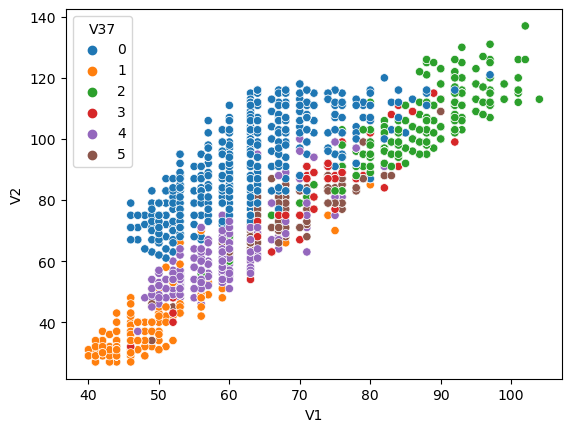

In [6]:
sns.scatterplot(x=trn['V1'], y=trn['V2'], hue=trn['V37'], palette='tab10')

In [7]:
X = trn[['V1', 'V2']].values
X_test = tst[['V1', 'V2']].values

y = trn['V37'].values
y_test = tst['V37'].values

# Ex. 3:

In [8]:
Cs = np.logspace(-3, 1, 5)
scores = []
for C in Cs:
    clf = svm.SVC(kernel='linear', C=C)
    scores.append(cross_val_score(clf, X, y, cv=5).mean())

In [9]:
scores

[0.7697857948139797,
 0.7675310033821872,
 0.7655016910935738,
 0.7657271702367531,
 0.7657271702367531]

No meaningful change, will just use 1.e-03

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


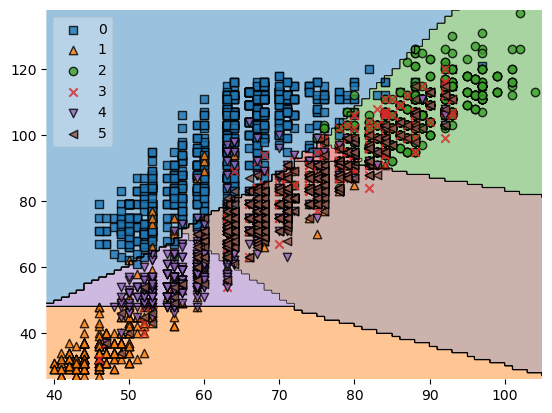

In [10]:
clf = svm.SVC(kernel='linear', C=Cs[0])
clf.fit(X, y)
y_pred = clf.predict(X_test)

plot_decision_regions(X, y, clf=clf, legend=2)
plt.show()

In [11]:
matrix = confusion_matrix(y_test, y_pred)
print('Accuracies:')
print(matrix.diagonal()/matrix.sum(axis=1))

Accuracies:
[0.9132321  0.82142857 0.92191436 0.04265403 0.57805907 0.86808511]


In [12]:
print(f'Overall accuracy: {accuracy_score(y_test, y_pred)}')

Overall accuracy: 0.7625


# Ex. 4:

In [25]:
parameters = {'C':[0.001, 1, 10], 'kernel':['poly', 'rbf', 'sigmoid']}

In [26]:
%%time
from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)
GridSearchCV(estimator=SVC(), param_grid=parameters)


Wall time: 3min 19s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 1, 10],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [27]:
clf.cv_results_['mean_test_score']

array([0.75152198, 0.24171364, 0.24171364, 0.7621195 , 0.77722661,
       0.24171364, 0.76302142, 0.77722661, 0.24171364])

In [28]:
clf.cv_results_['params']

[{'C': 0.001, 'kernel': 'poly'},
 {'C': 0.001, 'kernel': 'rbf'},
 {'C': 0.001, 'kernel': 'sigmoid'},
 {'C': 1, 'kernel': 'poly'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'sigmoid'},
 {'C': 10, 'kernel': 'poly'},
 {'C': 10, 'kernel': 'rbf'},
 {'C': 10, 'kernel': 'sigmoid'}]

Best results with C=1, kernel='rbf', was gonna tune gamma too, but training time was out of this world, did not bother.